<a href="https://colab.research.google.com/github/bigboivan/MAT422/blob/main/HW4_MAT422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You rolled a:  3
The probability of rolling 3-6 is: 0.6666666666666666
The probability of rolling each number is: 0.16666666666666666
The probability of the entire sample space is: 1.0
The probability of rolling a 1 then a 2 is: 0.027777777777777776
The variance of the random numbers above is: 1.028950936636399
The standard deviation of the random numbers above is: 1.0143721884182348


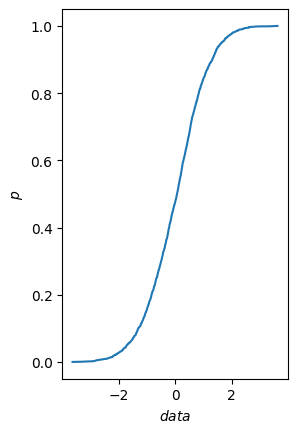

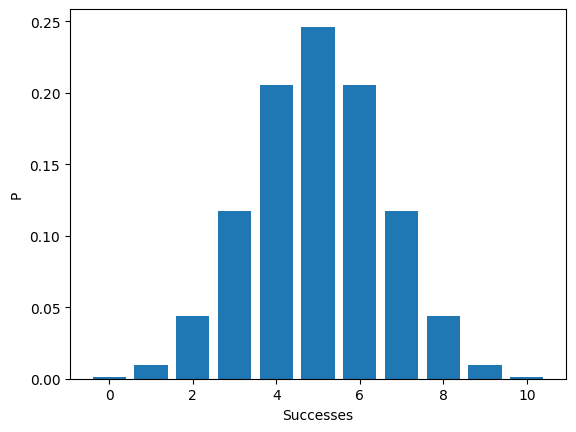

[65.27 65.39 65.6  65.92 66.9  67.1  67.16 67.33 67.55 67.84 68.43 68.5
 68.81 68.81 69.55 69.6  69.68 69.77 69.84 70.39 70.68 70.86 71.22 71.29
 71.34 71.4  71.42 71.64 72.13 72.41 72.77 72.87 73.   73.09 73.11 73.3
 73.45 73.67 73.69 73.72 74.74 74.78 74.8  74.81 74.98 75.12 75.16 75.54
 75.63 76.1  76.19 76.24 76.31 77.26 77.92 78.05 78.44 78.45 78.64 79.01
 79.56 80.21 80.41 80.47 80.79 81.02 81.68 82.09 82.23 82.37 82.91 83.26
 83.45 83.74 83.92 84.03 84.22 84.42 84.45 85.11 85.21 85.25 85.3  85.5
 85.83 86.1  86.5  86.54 86.55 86.76 86.76 87.9  87.95 88.41 88.52 88.8
 89.44 89.46 89.67 89.77]
The mean of the temps dataset above is: 77.31230000000001


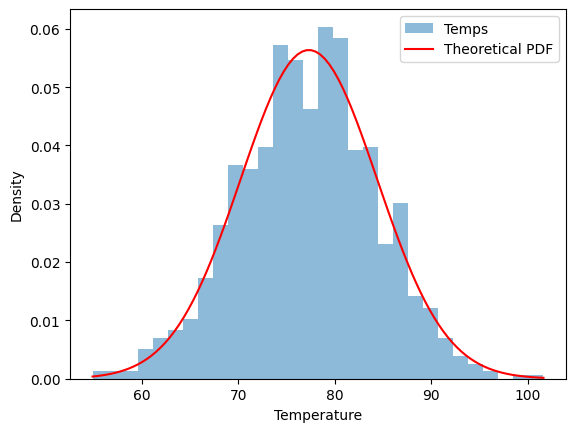

In [30]:
# HW 2.2 - MAT 422
# Ivan Matyushov

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import binom
from scipy.stats import norm

#Section 2.2.1 - Probability Axioms
def roll_dice(sides = 6):
  return random.randint(1, sides)

dice = roll_dice()
print("You rolled a: ", dice)
sides = 6
if dice == 1 or dice == 2:
  print("The probability of rolling a 1 or 2 is:", 1/sides*2) #Probability of mutually exclusive events
else:
  print("The probability of rolling 3-6 is:", 1/sides*4)
print("The probability of rolling each number is:", 1/sides) #Verifies probability of each event.
prob_sample_space = 1/sides * 6
print("The probability of the entire sample space is:", prob_sample_space) #Verifies that unity of sample space has probability of 1.

#Section 2.2.2 - Conditional Probability
cond_prob = 1/sides * 1/sides #Gives probability of rolling 2 same numbers by multiplying them
print("The probability of rolling a 1 then a 2 is:", cond_prob)



#Section 2.2.3 - Discrete Random Variables
cdf_data = np.random.randn(2000) #gives random set of numbers data
cdf_data_sort = np.sort(cdf_data) #sorts random set of numbers data
cdf = 1. * np.arange(len(cdf_data)) / (len(cdf_data) - 1) #gives cdf of numbers data
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(cdf_data_sort, cdf)
ax1.set_xlabel('$data$')
ax1.set_ylabel('$p$')

var_data = np.var(cdf_data) #Calculates variance of above data set
print("The variance of the random numbers above is:", var_data)
std_data = np.std(cdf_data)
print("The standard deviation of the random numbers above is:", std_data)

n = 10
p = 0.5 #This is like a coin flip situation
x = np.arange(0, 11)
pmf = binom.pmf(x, n, p) #Creates binomial distribution from the situation
fig1 = plt.figure() #Plots bar graph of binomial distribution
plt.bar(x, pmf)
plt.xlabel('Successes')
plt.ylabel('P')
plt.show()
#Section 2.2.4 - Continuous Random Variables
temps = []
for i in range(100):
  temps_rand = random.randint(6500, 9000)/100 #Generate 100 temperature values - continuous data due to decimals
  temps.append(temps_rand) #Create array of random temp values
sort_temps = np.sort(temps) #Sorts values in order of smallest to largest
print(sort_temps)
mean_temp = np.mean(sort_temps)
print("The mean of the temps dataset above is:", mean_temp)
std_temps = np.std(sort_temps) #Use std and mean for normal distribution

temps_norm = np.random.normal(mean_temp, std_temps, 1000) #Create normal distribution of data
fig, ax = plt.subplots()
ax.hist(temps_norm, bins=30, density=True, alpha=0.5, label='Temps') #Creates histogram of all data points
x = np.linspace(min(temps_norm), max(temps_norm), 100)
pdf1 = norm.pdf(x, mean_temp, std_temps)
ax.plot(x, pdf1, 'r', label='Normal PDF Line') #Plots the normal distribution line
ax.set_xlabel('Temperature')
ax.set_ylabel('Density')
ax.legend()